# quant-econ Solutions: Infinite Horizon Dynamic Programming

Solutions for http://quant-econ.net/py/optgrowth.html

Our objective is to compute the policy functions in the figures from the lecture URL give above.

In [1]:
%matplotlib inline

First let's add a few imports

In [2]:
from __future__ import division  # Not needed for Python 3.x
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

Now, we could import the functionality we need from `optgrowth_v0.py` or we could load that file here. A good software engineer would probably tell us to go for the first option, so as to avoid having the same code in two places. But sometimes it helps to break the rules.  We want to break the rules here because it's nice to have the code all together in one place. So here's an excert from that file:

In [3]:
from numpy import log
from scipy.optimize import fminbound
from scipy import interp

# Primitives and grid
alpha = 0.65
beta = 0.95
grid_max = 2
grid_size = 150
grid = np.linspace(1e-6, grid_max, grid_size)
# Exact solution
ab = alpha * beta
c1 = (log(1 - ab) + log(ab) * ab / (1 - ab)) / (1 - beta)
c2 = alpha / (1 - ab)


def v_star(k):
    return c1 + c2 * log(k)


def bellman_operator(w):
    """
    The approximate Bellman operator, which computes and returns the updated
    value function Tw on the grid points.

        * w is a flat NumPy array with len(w) = len(grid)

    The vector w represents the value of the input function on the grid
    points.
    """
    # === Apply linear interpolation to w === #
    Aw = lambda x: interp(x, grid, w)

    # === set Tw[i] equal to max_c { log(c) + beta w(f(k_i) - c)} === #
    Tw = np.empty(grid_size)
    for i, k in enumerate(grid):
        objective = lambda c: - log(c) - beta * Aw(k**alpha - c)
        c_star = fminbound(objective, 1e-6, k**alpha)
        Tw[i] = - objective(c_star)
    return Tw

Now we need a function to get the greedy policy from an approximate value function.

In [4]:
def compute_greedy(w):
    Aw = lambda x: interp(x, grid, w) 

    sigma = np.empty(grid_size)
    for i, k in enumerate(grid):
        objective = lambda c: - log(c) - beta * Aw(k**alpha - c)
        sigma[i] = fminbound(objective, 1e-6, k**alpha)
    return sigma
    

## Exercise 1

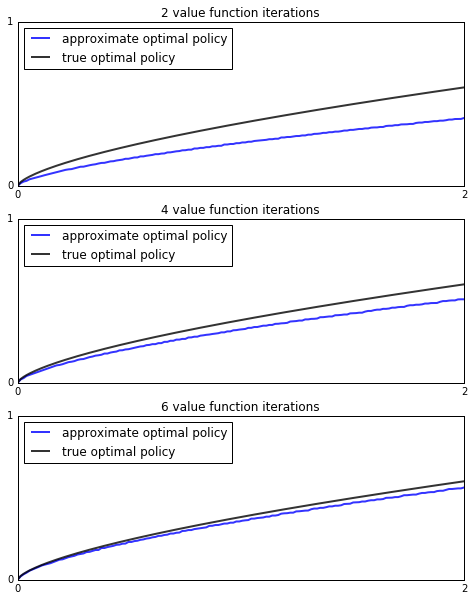

In [5]:
alpha, beta = 0.65, 0.95
true_sigma = (1 - alpha * beta) * grid**alpha

fig, ax = plt.subplots(3, 1, figsize=(8, 10))

for i, n in enumerate((2, 4, 6)):
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(0, 2)
    ax[i].set_yticks((0, 1))
    ax[i].set_xticks((0, 2))

    w = 5 * log(grid) - 25  # Initial condition
    v_star = qe.compute_fixed_point(bellman_operator, w, 
                                 max_iter=n, 
                                 verbose=0)
    sigma = compute_greedy(v_star)

    ax[i].plot(grid, sigma, 'b-', lw=2, alpha=0.8, label='approximate optimal policy')
    ax[i].plot(grid, true_sigma, 'k-', lw=2, alpha=0.8, label='true optimal policy')
    ax[i].legend(loc='upper left')
    ax[i].set_title('{} value function iterations'.format(n))
    
